In [5]:
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
import matplotlib 

from time import time

from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Carga conjunto de datos

Se proporciona la carpeta, a través de la variable folder, donde cada subcarpeta se corresponde con una clase.
Cada clase contiene muestras en forma de imágenes jpg, todas del mismo tamaño

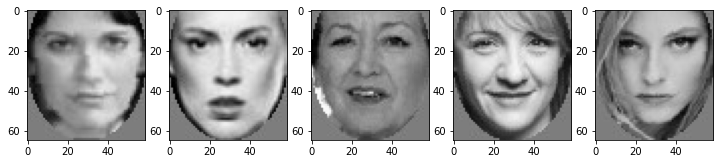

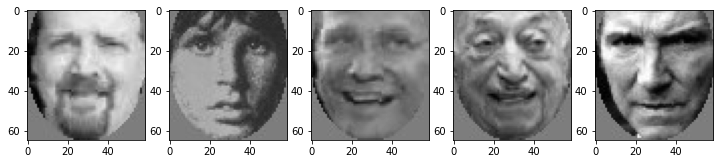

Dataset info:
# samples: 1184
# featues: 3835
# classes: 2
classes ['Female', 'Male']
samples per class 582, 602


In [6]:
folder = "DatabaseGender59x65"
# Contador de número de clases del conjunto
nclasses = 0
# Contador de muestras por clase
nperclass = []
# Etiqueta de cada clase (nombre de la subcarpeta)
classlabels = []
# Inicializa estructuras de datos y sus correpondientes etiquetas
X = []
Y = []

# Valor de resolución por defecto de matplotlib
dpi = matplotlib.rcParams['figure.dpi']
# Imágenes de muestra de cada clase a mostrar
nims2show = 5

# Asume que en la ruta indicada hay una subcarpeta por clase
for class_name in os.listdir(folder):
    # Cada subcarpeta implica una clase más
    nclasses += 1
    # Inicialmente esta clase no tiene muestras
    nsamples = 0    

    # Compone la ruta
    class_folder = os.path.join(folder, class_name)
    for file_name in os.listdir(class_folder):
        # Asume imágenes en formato jpg
        if file_name.endswith('.jpg'):
            # Lee la imagen
            image = cv2.imread (os.path.join(class_folder, file_name))
            
            # Lugar para aplicar un RoI
            
            # Extrae tamaños
            height, width, depth = image.shape
            # Convierte  grises
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Añade a X, previa conversión en vector
            X.append(gray.reshape(height*width))
            # Añade etiqueta numérica de la muestra
            Y.append(nclasses-1)
            # Muestra primera imagen de la clase
            
            # Muestra las nims2show primeras muestras de cada clase
            if nsamples < nims2show:
                if nsamples == 0:
                    
                    figsize = 15*width / float(dpi), 15*height / float(dpi)
                    fig = plt.figure(figsize=figsize)                
                
                fig.add_subplot(1,nims2show, nsamples + 1)
                plt.imshow(gray, cmap='gray', vmin=0, vmax=255)                
                
            #Incrementa el número de muestras
            nsamples += 1
    plt.show()
    nperclass.append(nsamples)
    classlabels.append(class_name)
    
#Convierte a numpy array X e Y
X = np.array(X,dtype='float32')
Y = np.array(Y,dtype='float64')

# Muestra datos del conjunto leído
# Depuración
#print(X.shape)
#print(Y.shape)
# Obtiene número de muestras y características
n_samples , n_features = X.shape
# Obtiene nombres de las clases
class_names = np.array(classlabels)
n_classes = class_names.shape[0]

print("Dataset info:")
print("# samples: %d" % n_samples)
print("# featues: %d" % n_features)
print("# classes: %d" % n_classes)
print("classes %s" % classlabels)
print("samples per class %s" % str(nperclass)[1:-1] )

# Diseña conjunto experimental k-fold

Divide los datos k veces en conjunto de entrenamiento y test

In [7]:
skf = StratifiedKFold(n_splits=5, random_state=4, shuffle=True)

fold = 1
for train_index, test_index in skf.split(X, Y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print("Fold %d" % fold)
    print("# samples in training set %d" % train_index.shape[0])
    print("# samples in test set %d" % test_index.shape[0])
    fold += 1

Fold 1
# samples in training set 947
# samples in test set 237
Fold 2
# samples in training set 947
# samples in test set 237
Fold 3
# samples in training set 947
# samples in test set 237
Fold 4
# samples in training set 947
# samples in test set 237
Fold 5
# samples in training set 948
# samples in test set 236


# Para cada fold: Random Forest

In [8]:
print("+++++++++++++++++++++++++++++++++++++++++++\n")
precs_rf, recs_rf = [], []

fold = 1
accs, precs, recs = [], [], []
for train_index, test_index in skf.split(X, Y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print("***\nFold %d" % fold)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    t0 = time()
    model_rf = RandomForestClassifier()   
    model_rf.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    
    print("Predicting...")
    t0 = time()
    y_pred = model_rf.predict(X_test)

    print("done in %0.3fs" % (time() - t0))
    
    print("Classification results:")
    print(classification_report(y_test, y_pred, target_names=class_names))       
    
    precs_rf.append(precision_score(y_test, y_pred))
    recs_rf.append(recall_score(y_test, y_pred))
    
    print("Confussion matrix:")
    print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
    
    fold += 1
    
print("\n********K-FOLD SUMMARY*********")
print("RF Mean Precision:  %0.3f, Mean Recall:  %0.3f" % ( np.mean(precs_rf) , np.mean(recs_rf) )) 

+++++++++++++++++++++++++++++++++++++++++++

***
Fold 1
done in 2.119s
Predicting...
done in 0.015s
Classification results:
              precision    recall  f1-score   support

      Female       0.81      0.75      0.78       117
        Male       0.77      0.82      0.80       120

    accuracy                           0.79       237
   macro avg       0.79      0.79      0.79       237
weighted avg       0.79      0.79      0.79       237

Confussion matrix:
[[88 29]
 [21 99]]
***
Fold 2
done in 2.131s
Predicting...
done in 0.013s
Classification results:
              precision    recall  f1-score   support

      Female       0.79      0.75      0.77       117
        Male       0.77      0.81      0.79       120

    accuracy                           0.78       237
   macro avg       0.78      0.78      0.78       237
weighted avg       0.78      0.78      0.78       237

Confussion matrix:
[[88 29]
 [23 97]]
***
Fold 3
done in 2.136s
Predicting...
done in 0.013s
Classificati